<a href="https://colab.research.google.com/github/RasikhTariq/machinelearning/blob/main/AIoTEnvironmental_Monitering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/2025-Skillet/Dataset.xlsx'
df = pd.read_excel(file_path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Categoría,AQI,CO2_e,RelativeHumidity,SoilMoisture,TVOC,AmbientTemperature
0,2025-04-17 15:55:30,3,723,13.66138,198,224,42.92450
1,2025-04-17 15:56:32,3,830,13.72709,198,387,43.86044
2,2025-04-17 15:57:34,3,821,13.59062,198,360,44.09714
3,2025-04-17 15:58:36,3,811,13.41019,198,329,43.95924
4,2025-04-17 15:59:38,3,828,13.72719,198,380,43.70880
...,...,...,...,...,...,...,...
8892,2025-04-24 10:10:04,2,625,22.78624,198,138,31.13708
8893,2025-04-24 10:11:06,2,613,22.85728,198,148,31.26183
8894,2025-04-24 10:12:08,2,599,23.11707,198,131,31.32515
8895,2025-04-24 10:13:13,2,670,23.23132,198,192,31.44379


In [25]:
df.dtypes

,0
Categoría,datetime64[ns]
AQI,int64
CO2_e,int64
RelativeHumidity,float64
SoilMoisture,int64
TVOC,int64
AmbientTemperature,float64


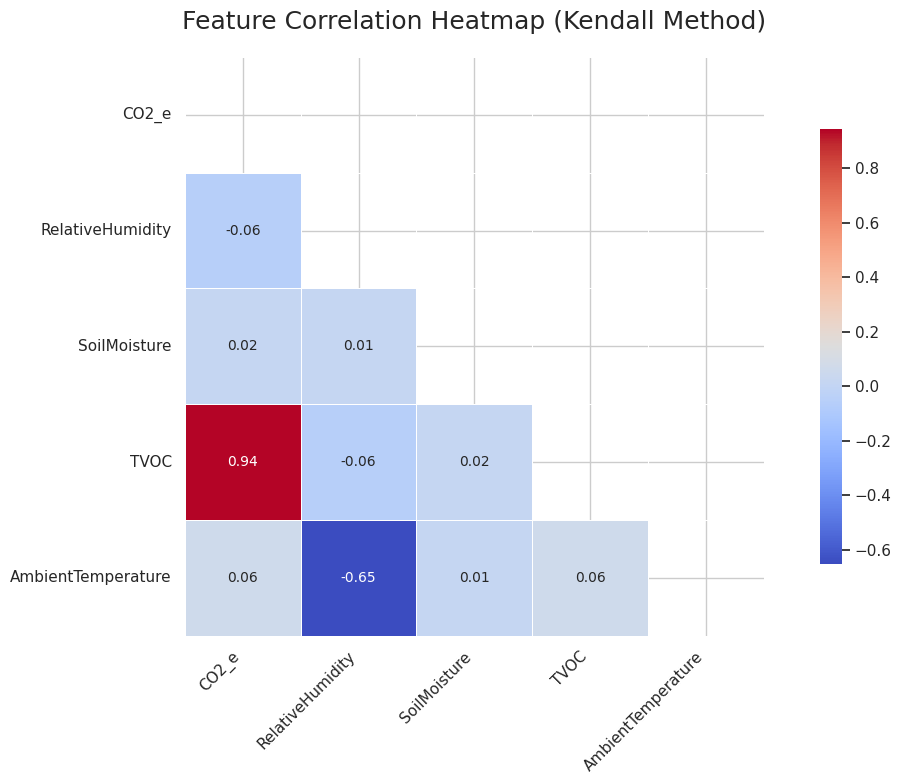

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop categorical columns and 'AQI'
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=['AQI'], errors='ignore')

# Set up the visual aesthetics
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Generate a Kendall correlation matrix
corr = df_numeric.corr(method='kendall')

# Mask the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the heatmap
heatmap = sns.heatmap(corr,
                      mask=mask,
                      annot=True,
                      fmt=".2f",
                      linewidths=0.5,
                      cmap="coolwarm",
                      square=True,
                      cbar_kws={"shrink": 0.75},
                      annot_kws={"size": 10})

# Customize further
plt.title('Feature Correlation Heatmap (Kendall Method)', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [27]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Drop categorical columns and 'AQI'
X = df.select_dtypes(include=[np.number]).drop(columns=['AQI'], errors='ignore')

# Add constant term for intercept
X = add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif


,Feature,VIF
0,const,8897.000000
1,CO2_e,3.686352
2,RelativeHumidity,3.133110
3,SoilMoisture,1.032444
4,TVOC,3.633491
5,AmbientTemperature,3.184412


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector,

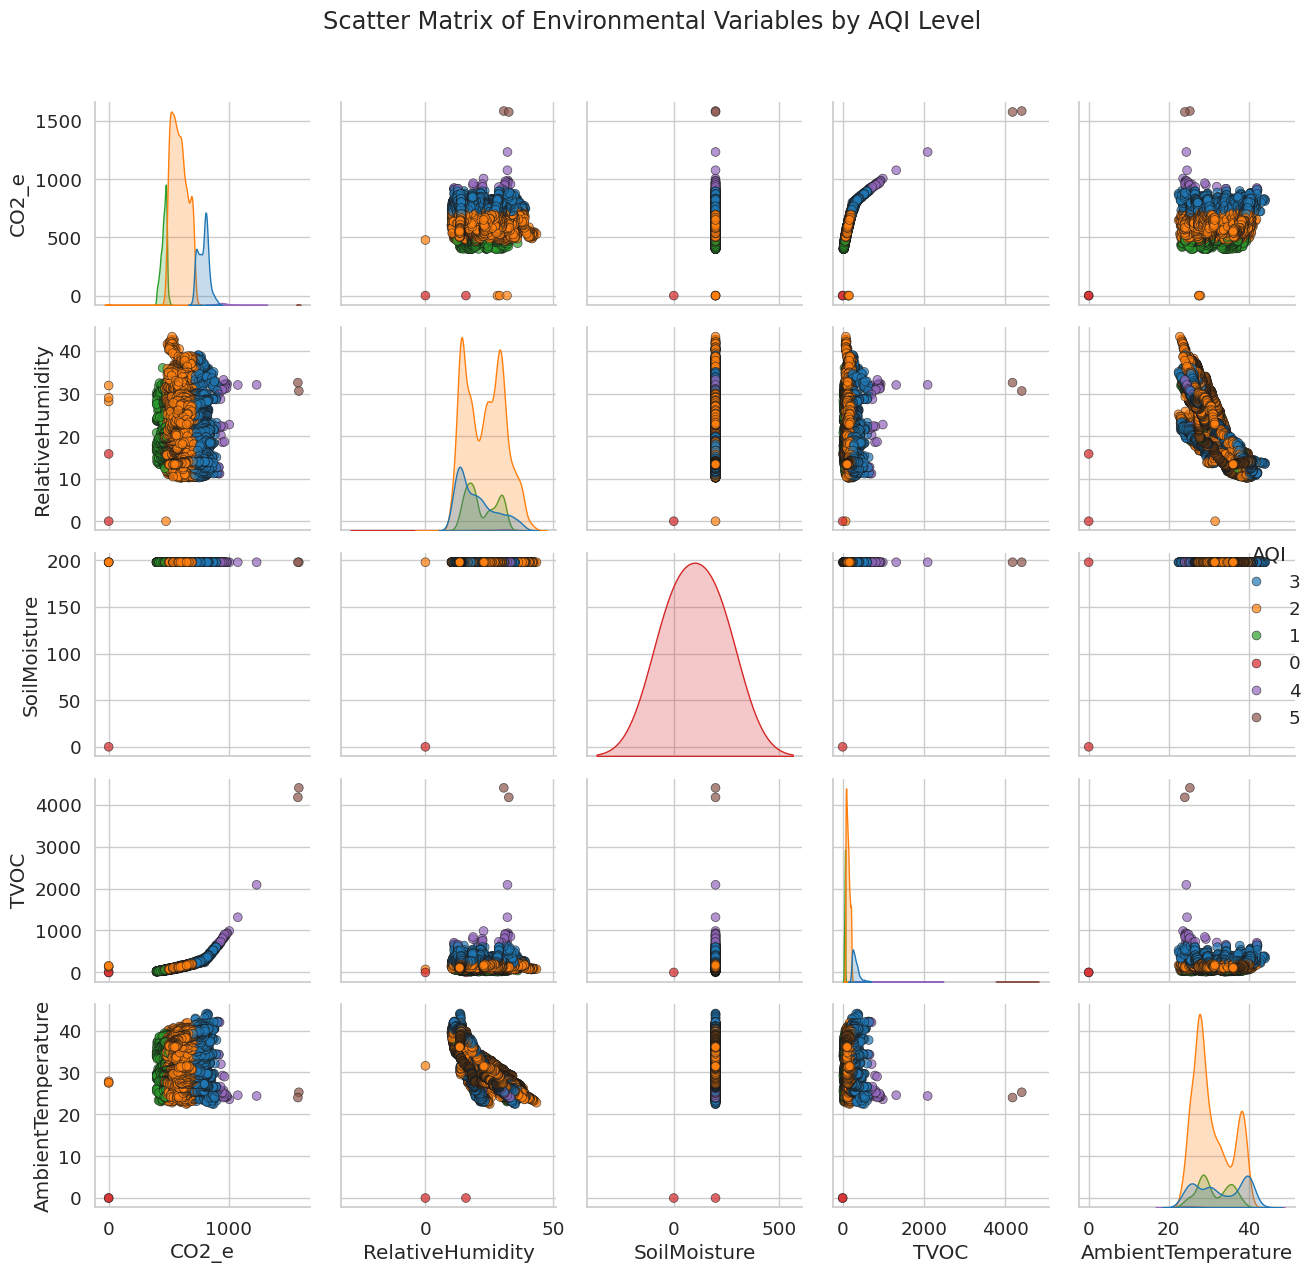

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace this with your actual data)
# df = pd.read_csv('your_data.csv')

# Ensure AQI is treated as a categorical variable
df['AQI'] = df['AQI'].astype(str)

# Create the scatter matrix
sns.set(style="whitegrid", context="notebook", font_scale=1.2)
scatter = sns.pairplot(
    df,
    hue='AQI',
    diag_kind='kde',
    palette='tab10',
    plot_kws={'alpha': 0.7, 's': 40, 'edgecolor': 'k'},
    diag_kws={'shade': True}
)

# Adjust plot labels and title
scatter.fig.suptitle('Scatter Matrix of Environmental Variables by AQI Level', y=1.02)
plt.tight_layout()
plt.show()


In [29]:
pip install kneed


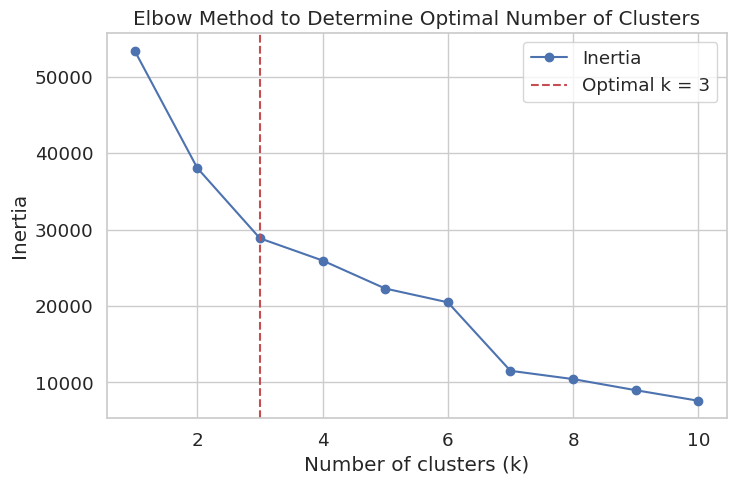

The optimal number of clusters (k) is: 3


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

# Select relevant features including AQI
features = ['AQI', 'CO2_e', 'RelativeHumidity', 'SoilMoisture', 'TVOC', 'AmbientTemperature']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Automatically detect the "elbow" point using KneeLocator
knee = KneeLocator(k_range, inertia, curve='convex', direction='decreasing')
optimal_k = knee.knee

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', label='Inertia')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal number of clusters (k) is: {optimal_k}")


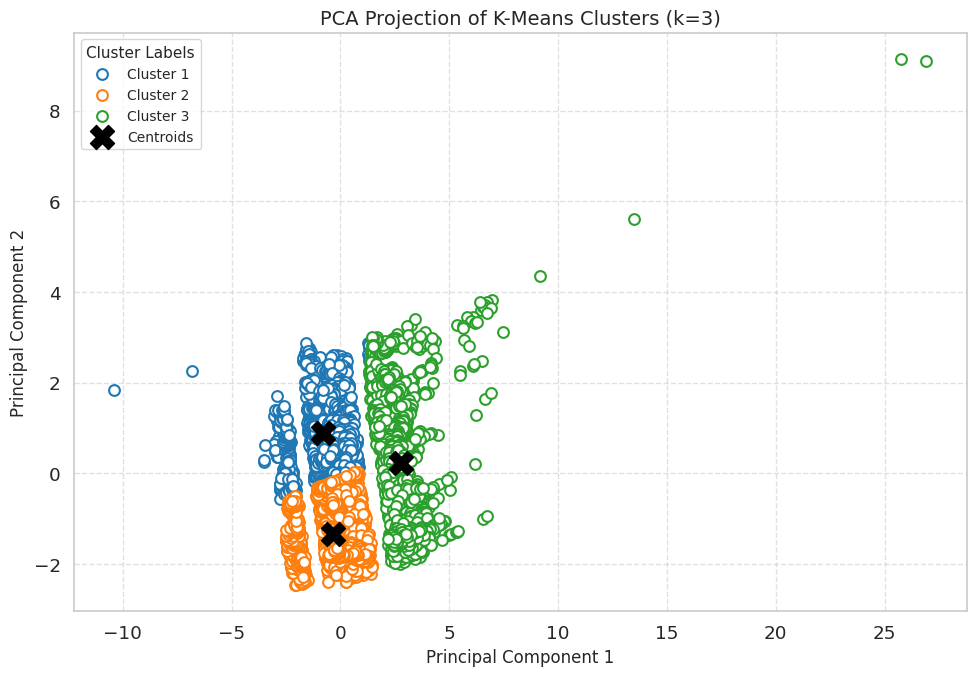

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define the features including AQI
features = ['AQI', 'CO2_e', 'RelativeHumidity', 'SoilMoisture', 'TVOC', 'AmbientTemperature']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot
plt.figure(figsize=(10, 7))
colors = ['white', 'white', 'white']
edgecolors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Matplotlib's default palette

for cluster_id in range(k):
    plt.scatter(
        X_pca[clusters == cluster_id, 0],
        X_pca[clusters == cluster_id, 1],
        facecolors=colors[cluster_id],
        edgecolors=edgecolors[cluster_id],
        label=f'Cluster {cluster_id + 1}',
        linewidths=1.5,
        s=60,
        marker='o'
    )

# Plot centroids
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c='black',
    s=300,
    marker='X',
    label='Centroids',
    edgecolors='black'
)

plt.title('PCA Projection of K-Means Clusters (k=3)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster Labels', fontsize=10, title_fontsize=11, loc='best', frameon=True)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


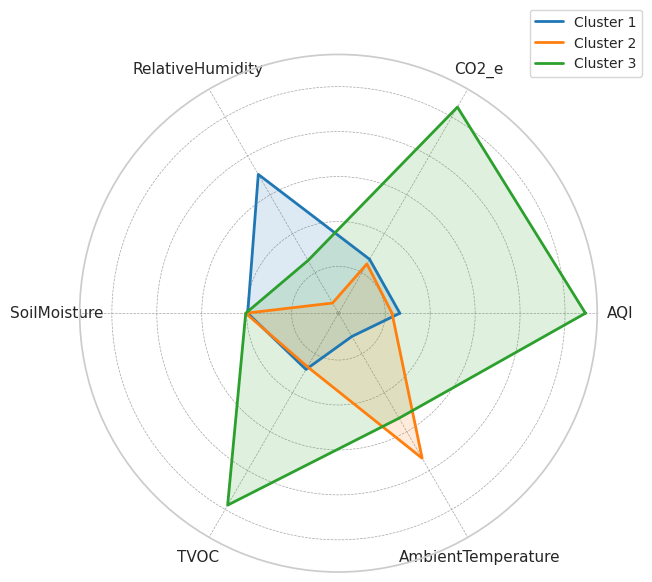

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Define features
features = ['AQI', 'CO2_e', 'RelativeHumidity', 'SoilMoisture', 'TVOC', 'AmbientTemperature']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
cluster_centers_scaled = kmeans.cluster_centers_

# Radar plot setup
labels = features
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # repeat the first angle to close the circle

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

for i in range(k):
    values = cluster_centers_scaled[i].tolist()
    values += values[:1]  # close the polygon
    ax.plot(angles, values, color=colors[i], linewidth=2, label=f'Cluster {i+1}')
    ax.fill(angles, values, color=colors[i], alpha=0.15)

# Aesthetic improvements
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=11)
ax.set_yticklabels([])
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), fontsize=10, frameon=True)
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


In [36]:
df

,AQI,CO2_e,RelativeHumidity,SoilMoisture,TVOC,AmbientTemperature,cluster
Categoría,,,,,,,
2025-04-17 15:55:30,3,723,13.66138,198,224,42.92450,2
2025-04-17 15:56:32,3,830,13.72709,198,387,43.86044,2
2025-04-17 15:57:34,3,821,13.59062,198,360,44.09714,2
2025-04-17 15:58:36,3,811,13.41019,198,329,43.95924,2
2025-04-17 15:59:38,3,828,13.72719,198,380,43.70880,2
...,...,...,...,...,...,...,...
2025-04-24 10:10:04,2,625,22.78624,198,138,31.13708,0
2025-04-24 10:11:06,2,613,22.85728,198,148,31.26183,0
2025-04-24 10:12:08,2,599,23.11707,198,131,31.32515,0


In [38]:
df

,AQI_Level,CO2_e,RelativeHumidity,SoilMoisture,TVOC,AmbientTemperature,cluster
Categoría,,,,,,,
2025-04-17 15:55:30,3,723,13.66138,198,224,42.92450,2
2025-04-17 15:56:32,3,830,13.72709,198,387,43.86044,2
2025-04-17 15:57:34,3,821,13.59062,198,360,44.09714,2
2025-04-17 15:58:36,3,811,13.41019,198,329,43.95924,2
2025-04-17 15:59:38,3,828,13.72719,198,380,43.70880,2
...,...,...,...,...,...,...,...
2025-04-24 10:10:04,2,625,22.78624,198,138,31.13708,0
2025-04-24 10:11:06,2,613,22.85728,198,148,31.26183,0
2025-04-24 10:12:08,2,599,23.11707,198,131,31.32515,0


In [39]:
print(df.columns.tolist())


['AQI_Level', 'CO2_e', 'RelativeHumidity', 'SoilMoisture', 'TVOC', 'AmbientTemperature', 'cluster']


In [40]:
df

,AQI_Level,CO2_e,RelativeHumidity,SoilMoisture,TVOC,AmbientTemperature,cluster
Categoría,,,,,,,
2025-04-17 15:55:30,3,723,13.66138,198,224,42.92450,2
2025-04-17 15:56:32,3,830,13.72709,198,387,43.86044,2
2025-04-17 15:57:34,3,821,13.59062,198,360,44.09714,2
2025-04-17 15:58:36,3,811,13.41019,198,329,43.95924,2
2025-04-17 15:59:38,3,828,13.72719,198,380,43.70880,2
...,...,...,...,...,...,...,...
2025-04-24 10:10:04,2,625,22.78624,198,138,31.13708,0
2025-04-24 10:11:06,2,613,22.85728,198,148,31.26183,0
2025-04-24 10:12:08,2,599,23.11707,198,131,31.32515,0


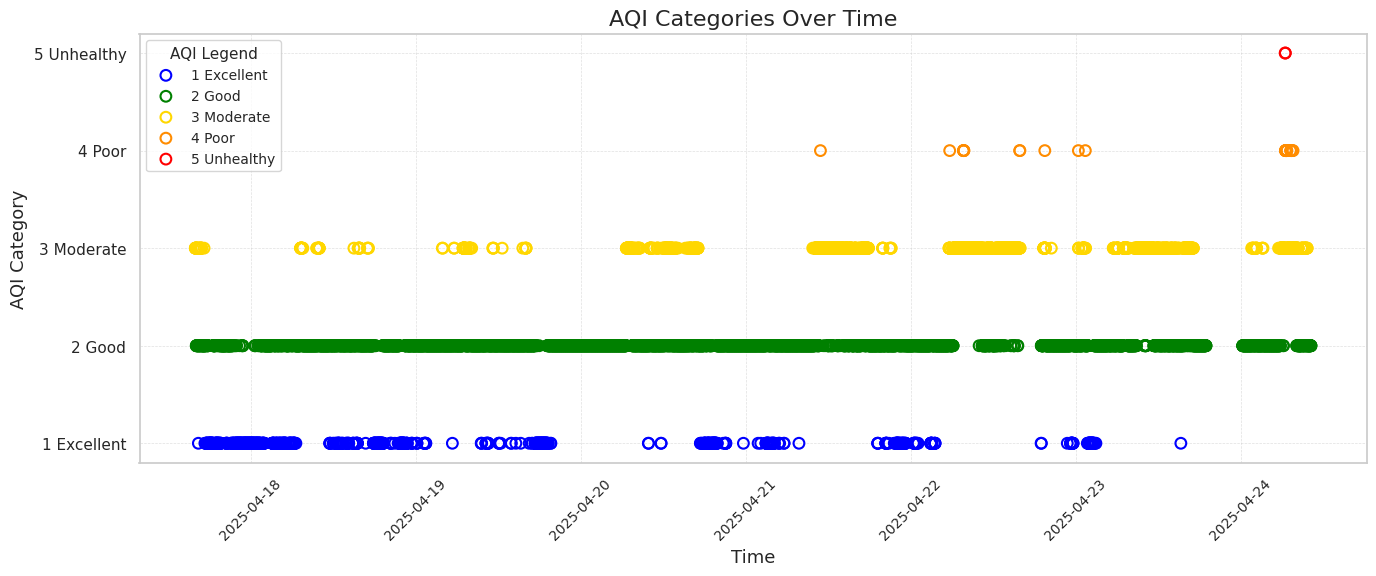

In [44]:
import matplotlib.pyplot as plt

# Ensure datetime index
df.index = pd.to_datetime(df.index)
df_filtered = df[df['AQI_Level'] > 0]

# Define AQI categories and style
aqi_categories = {
    1: ('Excellent', 'blue'),
    2: ('Good', 'green'),
    3: ('Moderate', 'gold'),
    4: ('Poor', 'darkorange'),
    5: ('Unhealthy', 'red')
}

# Start figure
plt.figure(figsize=(14, 6))

# Plot points per category
for level, (label, color) in aqi_categories.items():
    subset = df_filtered[df_filtered['AQI_Level'] == level]
    plt.scatter(
        subset.index, subset['AQI_Level'],
        label=f'{level} {label}',
        edgecolors=color,
        facecolors='none',
        linewidths=1.5,
        s=60
    )

# Replace numeric y-ticks with category labels
plt.yticks(
    [1, 2, 3, 4, 5],
    ['1 Excellent', '2 Good', '3 Moderate', '4 Poor', '5 Unhealthy'],
    fontsize=11
)

# Axis and grid
plt.title('AQI Categories Over Time', fontsize=16)
plt.xlabel('Time', fontsize=13)
plt.ylabel('AQI Category', fontsize=13)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

# Legend
plt.legend(title='AQI Legend', fontsize=10, title_fontsize=11, loc='upper left', frameon=True)

plt.tight_layout()
plt.show()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.2685
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0439
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0526
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0363
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0414
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0347
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0334
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0307
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0274
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0270
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0313
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0254
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0201
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0220
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0214
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/

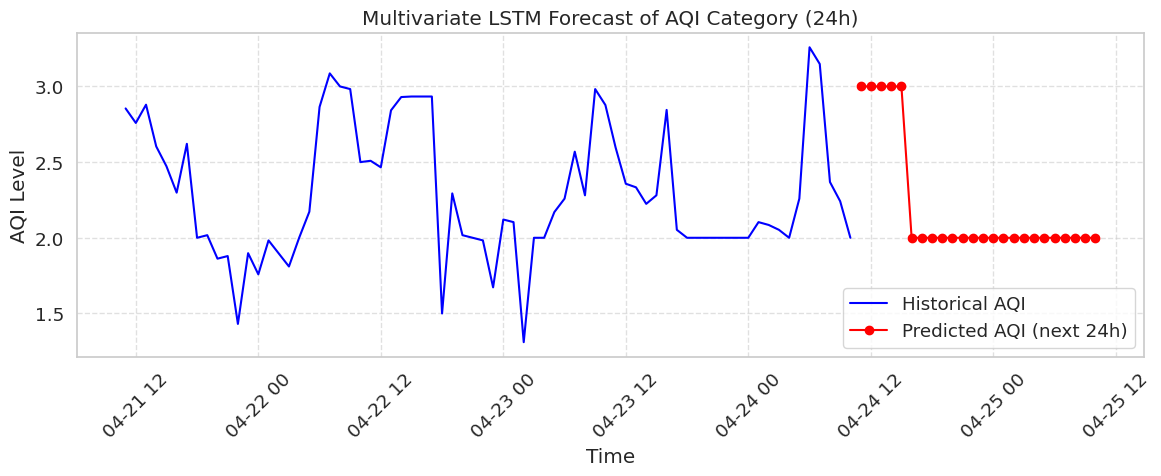

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Select multivariate features
features = ['AQI_Level', 'CO2_e', 'RelativeHumidity', 'SoilMoisture', 'TVOC', 'AmbientTemperature']
df_selected = df[features].copy()

# Step 2: Ensure index is datetime and resample to 1 hour
df_selected.index = pd.to_datetime(df_selected.index)
df_resampled = df_selected.resample('1h').mean().ffill()

# Step 3: Drop missing or invalid values
df_resampled = df_resampled.dropna()
df_resampled = df_resampled[df_resampled['AQI_Level'] > 0]

# Step 4: Normalize all features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_resampled)

# Step 5: Create sequences
SEQ_LEN = 24
X, y = [], []

for i in range(len(scaled_data) - SEQ_LEN):
    X.append(scaled_data[i:i + SEQ_LEN])
    y.append(scaled_data[i + SEQ_LEN][0])  # target: AQI_Level

X, y = np.array(X), np.array(y)

# Step 6: Build multivariate LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(SEQ_LEN, X.shape[2])))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Step 7: Train the model
model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Step 8: Predict next 24 AQI levels
last_seq = X[-1].reshape(1, SEQ_LEN, X.shape[2])
future_preds = []

for _ in range(24):
    next_pred = model.predict(last_seq)[0][0]

    # Build new input by combining prediction with recent env. data
    next_features = last_seq[0, -1].copy()
    next_features[0] = next_pred  # replace AQI_Level
    last_seq = np.append(last_seq[:, 1:, :], [[next_features]], axis=1)

    future_preds.append(next_pred)

# Step 9: Inverse scale only AQI predictions
aqi_index = features.index('AQI_Level')
inverse_preds = np.array(future_preds).reshape(-1, 1)

# Build dummy array to fit inverse_transform shape
dummy = np.zeros((len(inverse_preds), len(features)))
dummy[:, aqi_index] = inverse_preds[:, 0]

# Inverse transform only AQI
aqi_pred_unscaled = scaler.inverse_transform(dummy)[:, aqi_index]
aqi_pred_rounded = np.clip(np.round(aqi_pred_unscaled), 1, 5).astype(int)

# Step 10: Plot historical + predicted
last_timestamp = df_resampled.index[-1]
future_index = pd.date_range(last_timestamp + pd.Timedelta(hours=1), periods=24, freq='h')

plt.figure(figsize=(12, 5))
plt.plot(df_resampled.index[-72:], df_resampled['AQI_Level'][-72:], label='Historical AQI', color='blue')
plt.plot(future_index, aqi_pred_rounded, label='Predicted AQI (next 24h)', color='red', marker='o')
plt.title('Multivariate LSTM Forecast of AQI Category (24h)')
plt.xlabel('Time')
plt.ylabel('AQI Level')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9xp0x8vk/8_5_94_q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9xp0x8vk/9ceuwx7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97407', 'data', 'file=/tmp/tmp9xp0x8vk/8_5_94_q.json', 'init=/tmp/tmp9xp0x8vk/9ceuwx7v.json', 'output', 'file=/tmp/tmp9xp0x8vk/prophet_model5iwh46b4/prophet_model-20250429175223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:52:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:52:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version

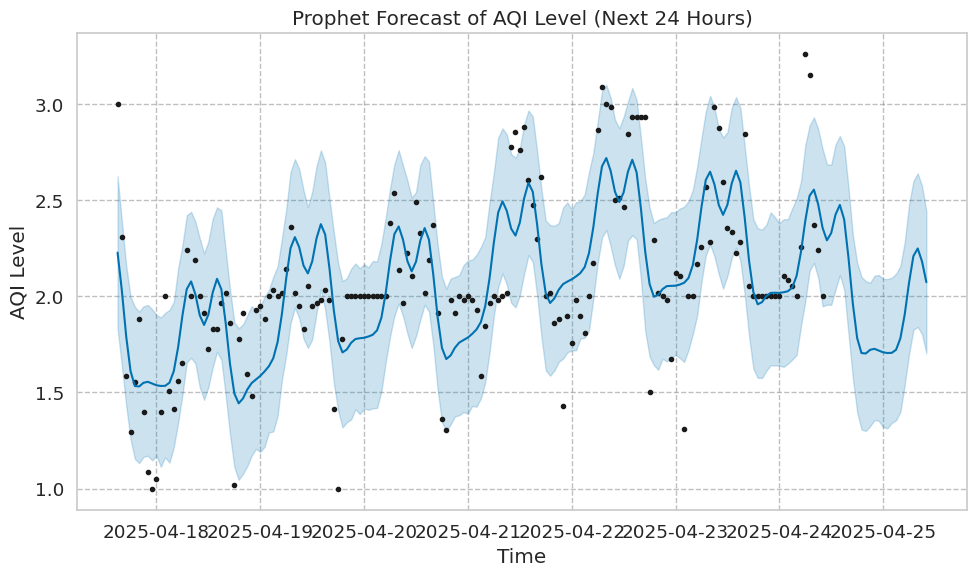

In [48]:
# Step 1: Install prophet if not already installed
# !pip install prophet

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Step 2: Prepare the dataframe
# Ensure the index is datetime
df_prophet = df[['AQI_Level']].copy()
df_prophet.index = pd.to_datetime(df_prophet.index)

# Resample hourly to regularize the time series
df_prophet = df_prophet.resample('1h').mean().ffill()
df_prophet = df_prophet[df_prophet['AQI_Level'] > 0]  # remove invalid values

# Rename columns for Prophet
df_prophet = df_prophet.reset_index().rename(columns={'Categoría': 'ds', 'AQI_Level': 'y'})

# Step 3: Create and fit the Prophet model
model = Prophet(daily_seasonality=True, weekly_seasonality=True)
model.fit(df_prophet)

# Step 4: Create future dataframe for next 24 hours
future = model.make_future_dataframe(periods=24, freq='H')

# Step 5: Predict
forecast = model.predict(future)

# Step 6: Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast of AQI Level (Next 24 Hours)')
plt.xlabel('Time')
plt.ylabel('AQI Level')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


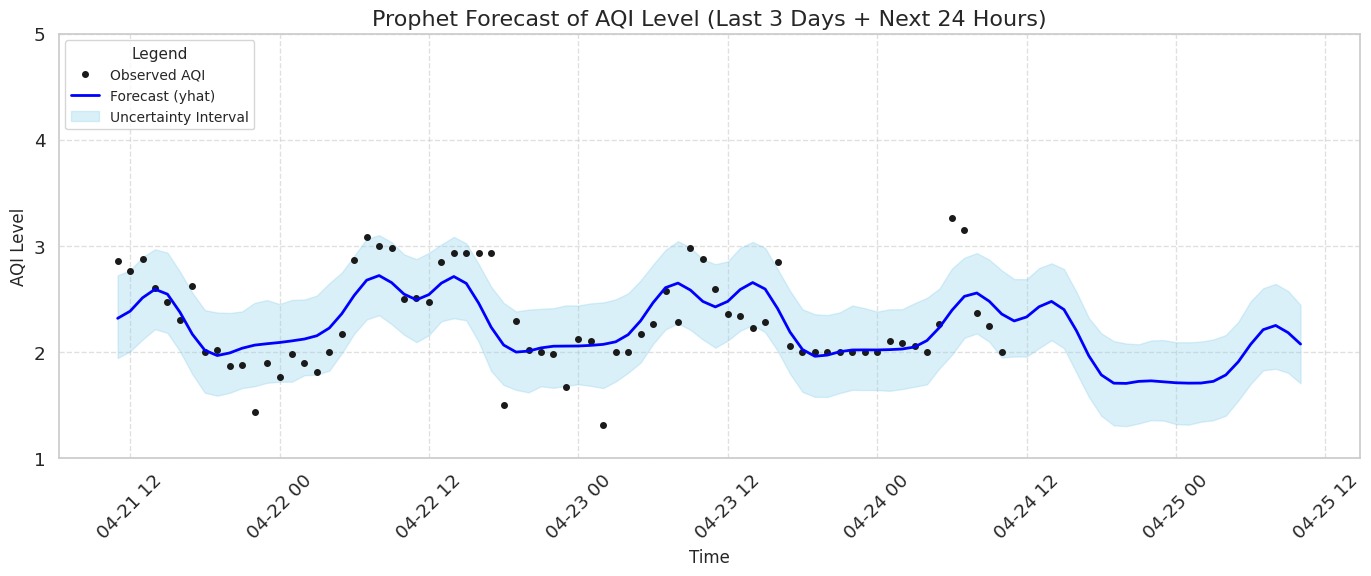

In [49]:
# Plot manually for full control
plt.figure(figsize=(14, 6))

# Plot observed data (last 72 hours)
plt.plot(df_prophet['ds'][-72:], df_prophet['y'][-72:], 'ko', markersize=4, label='Observed AQI')

# Plot forecast (last 72h + 24h forecast)
plt.plot(forecast['ds'][-96:], forecast['yhat'][-96:], color='blue', linewidth=2, label='Forecast (yhat)')

# Plot uncertainty interval (80%)
plt.fill_between(forecast['ds'][-96:],
                 forecast['yhat_lower'][-96:],
                 forecast['yhat_upper'][-96:],
                 color='skyblue', alpha=0.3, label='Uncertainty Interval')

# Custom aesthetics
plt.title('Prophet Forecast of AQI Level (Last 3 Days + Next 24 Hours)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('AQI Level', fontsize=12)
plt.xticks(rotation=45)
plt.yticks([1, 2, 3, 4, 5])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left', fontsize=10, title='Legend', title_fontsize=11)
plt.tight_layout()
plt.show()


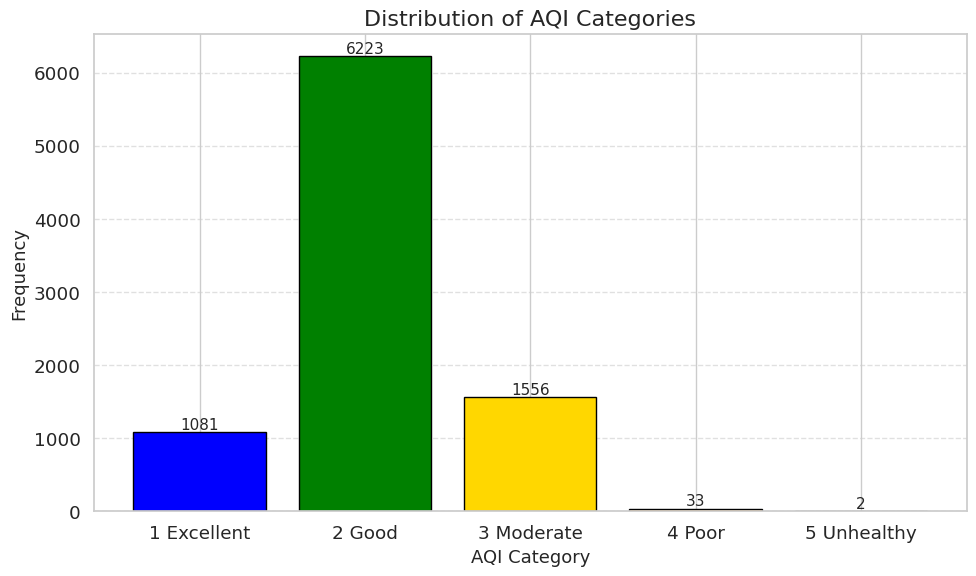

In [50]:
import matplotlib.pyplot as plt

# Ensure AQI_Level is clean
df['AQI_Level'] = pd.to_numeric(df['AQI_Level'], errors='coerce')
df_clean = df[df['AQI_Level'] > 0]

# Count each AQI category
class_counts = df_clean['AQI_Level'].value_counts().sort_index()

# Define labels and colors
labels = {
    1: '1 Excellent',
    2: '2 Good',
    3: '3 Moderate',
    4: '4 Poor',
    5: '5 Unhealthy'
}
colors = {
    1: 'blue',
    2: 'green',
    3: 'gold',
    4: 'darkorange',
    5: 'red'
}

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(
    [labels[k] for k in class_counts.index],
    class_counts.values,
    color=[colors[k] for k in class_counts.index],
    edgecolor='black'
)

# Add count labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval),
             ha='center', va='bottom', fontsize=11)

# Aesthetics
plt.title('Distribution of AQI Categories', fontsize=16)
plt.xlabel('AQI Category', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [51]:
from sklearn.utils import resample
import pandas as pd

# Ensure 'AQI_Level' is numeric and clean
df['AQI_Level'] = pd.to_numeric(df['AQI_Level'], errors='coerce')
df_clean = df[df['AQI_Level'] > 0]

# Separate by class
df_list = [df_clean[df_clean['AQI_Level'] == k] for k in range(1, 6)]

# Find maximum class size
max_size = max([len(d) for d in df_list])

# Oversample each class to max_size
df_balanced = pd.concat([
    resample(d, replace=True, n_samples=max_size, random_state=42) for d in df_list
])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


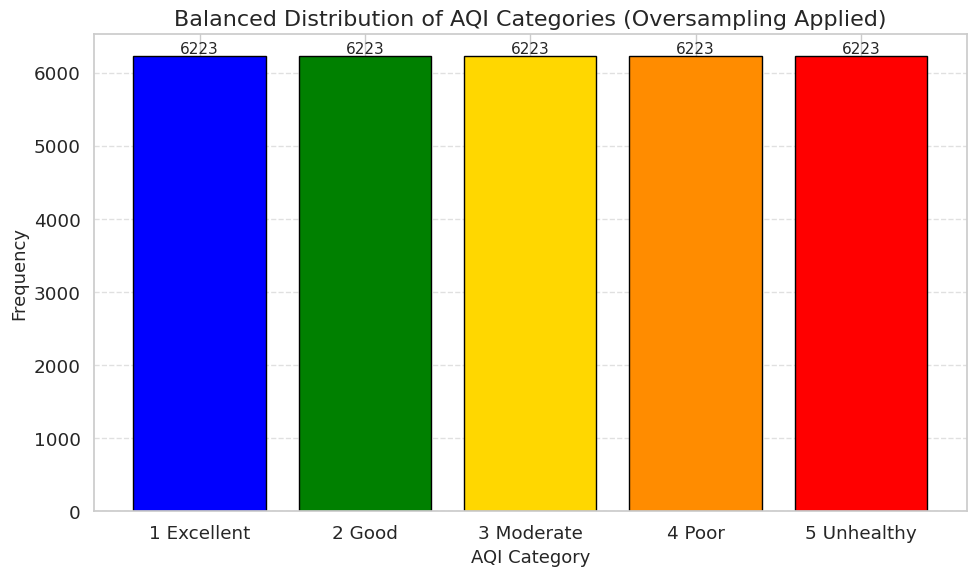

In [52]:
import matplotlib.pyplot as plt

# Count each AQI category after balancing
class_counts_balanced = df_balanced['AQI_Level'].value_counts().sort_index()

# Define labels and colors
labels = {
    1: '1 Excellent',
    2: '2 Good',
    3: '3 Moderate',
    4: '4 Poor',
    5: '5 Unhealthy'
}
colors = {
    1: 'blue',
    2: 'green',
    3: 'gold',
    4: 'darkorange',
    5: 'red'
}

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(
    [labels[k] for k in class_counts_balanced.index],
    class_counts_balanced.values,
    color=[colors[k] for k in class_counts_balanced.index],
    edgecolor='black'
)

# Add count labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, int(yval),
             ha='center', va='bottom', fontsize=11)

# Aesthetics
plt.title('Balanced Distribution of AQI Categories (Oversampling Applied)', fontsize=16)
plt.xlabel('AQI Category', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [64]:
df_balanced

,AQI_Level,CO2_e,RelativeHumidity,SoilMoisture,TVOC,AmbientTemperature,cluster
0,1,413,23.77443,198,32,29.63219,0
1,5,1586,30.62449,198,4401,25.26970,2
2,1,459,26.73149,198,51,30.41344,0
3,5,1578,32.57866,198,4175,24.00169,2
4,5,1578,32.57866,198,4175,24.00169,2
...,...,...,...,...,...,...,...
31110,5,1578,32.57866,198,4175,24.00169,2
31111,1,484,13.70754,198,64,37.44240,1
31112,1,479,24.48425,198,61,30.41592,0
31113,3,801,27.82736,198,300,27.22168,2


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


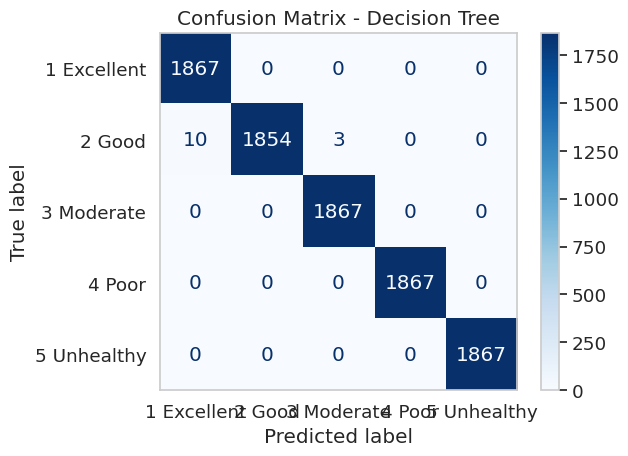

Classification Report:

              precision    recall  f1-score   support

 1 Excellent       0.99      1.00      1.00      1867
      2 Good       1.00      0.99      1.00      1867
  3 Moderate       1.00      1.00      1.00      1867
      4 Poor       1.00      1.00      1.00      1867
 5 Unhealthy       1.00      1.00      1.00      1867

    accuracy                           1.00      9335
   macro avg       1.00      1.00      1.00      9335
weighted avg       1.00      1.00      1.00      9335



In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Step 1: Prepare data
X = df_balanced.drop(columns=['AQI_Level','cluster'])  # Features
y = df_balanced['AQI_Level']                 # Target (1–5)

# AQI category labels
class_labels = ['1 Excellent', '2 Good', '3 Moderate', '4 Poor', '5 Unhealthy']

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 3: Hyperparameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 4: Grid search
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Step 5: Evaluate best model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 2, 3, 4, 5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Decision Tree")
plt.grid(False)
plt.tight_layout()
plt.show()

# Step 7: Classification Report
report = classification_report(y_test, y_pred, target_names=class_labels)
print("Classification Report:\n")
print(report)


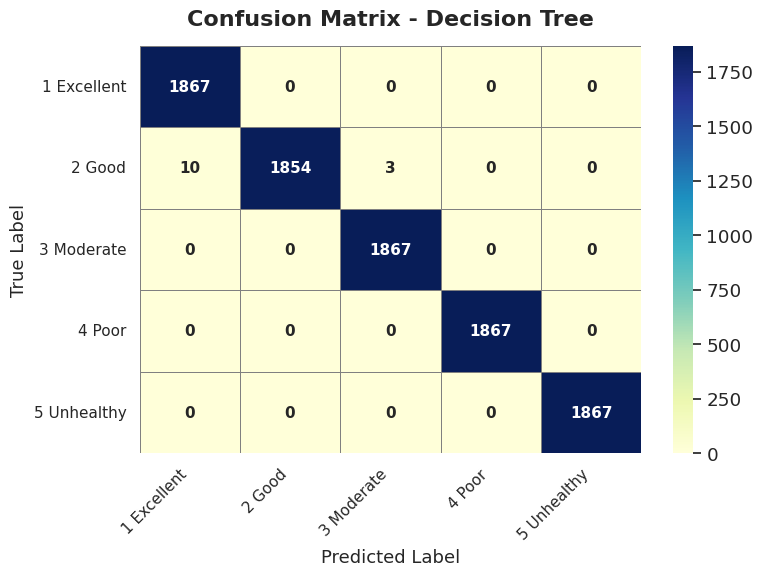

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate as numpy array to pass to seaborn
cm_array = np.array(cm)

fig, ax = plt.subplots(figsize=(8, 6))

# Custom colormap (Blues with reversed shading for visual clarity)
sns.heatmap(
    cm_array,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    cbar=True,
    xticklabels=class_labels,
    yticklabels=class_labels,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={"size": 11, "weight": "bold"},
    ax=ax
)

# Titles and labels
ax.set_title('Confusion Matrix - Decision Tree', fontsize=16, fontweight='bold', pad=15)
ax.set_xlabel('Predicted Label', fontsize=13)
ax.set_ylabel('True Label', fontsize=13)

# Style and ticks
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)

# Remove frame/spines
for _, spine in ax.spines.items():
    spine.set_visible(False)

plt.tight_layout()
plt.show()


<ipython-input-68-d39f5daf34d0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


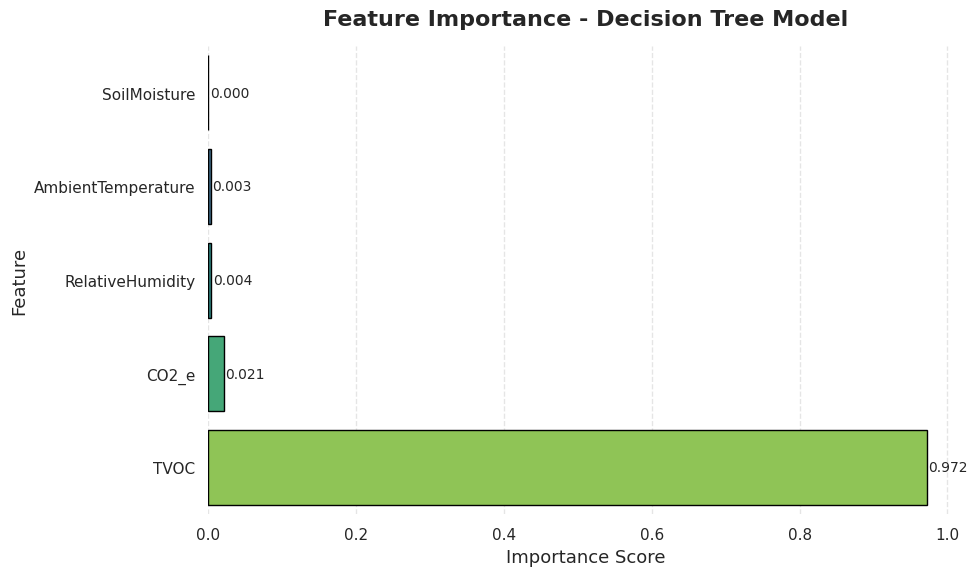

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Extract feature importances
importances = best_model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)

# Step 2: Sort for visual clarity
feat_importances = feat_importances.sort_values(ascending=True)

# Step 3: Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=feat_importances.values,
    y=feat_importances.index,
    palette='viridis',  # Try 'flare' or 'mako' as alternatives
    edgecolor='black'
)

# Add numeric labels to bars
for i, (value, name) in enumerate(zip(feat_importances.values, feat_importances.index)):
    ax.text(value + 0.002, i, f"{value:.3f}", va='center', fontsize=10)

# Aesthetic styling
plt.title('Feature Importance - Decision Tree Model', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Importance Score', fontsize=13)
plt.ylabel('Feature', fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()
